# Bagging and random forest
## Programming assignment 
### Week 4

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

%matplotlib inline

In [2]:
def write_answer(number, cvs):
    cv_score = cvs.mean()
    print(f"Average CV scor: {cv_score}")
    with open(f"answer-{number}.txt", 'w') as file:
        file.write(str(cv_score))

## Load digits dataset

In [3]:
data, target = load_digits(return_X_y=True)

In [4]:
data.shape

(1797, 64)

Text(0.5, 1.0, 'Target: 7')

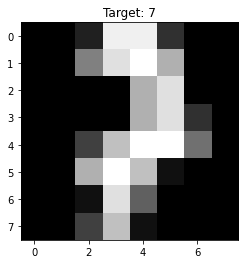

In [5]:
i = np.random.randint(0, data.shape[0])
plt.imshow(data[i].reshape((8,8)),  cmap='gray')
plt.title(f"Target: {target[i]}")

## Simple decision tree

In [6]:
sdtree = DecisionTreeClassifier()

In [7]:
sd_cvs = cross_val_score(sdtree, data, target, cv=10)

In [8]:
write_answer(1, sd_cvs)

Average CV scor: 0.8208100558659218


## Simple bagging
### 100 simple decision trees

In [9]:
sbagging = BaggingClassifier(base_estimator=sdtree, n_estimators=100)

In [10]:
sbagging_cvs = cross_val_score(sbagging, data, target, cv=10, n_jobs=-1)

In [11]:
write_answer(2, sbagging_cvs)

Average CV scor: 0.9248448168839231


## Train bagging with same $\sqrt{d}$ features

In [12]:
dsbagging = BaggingClassifier(base_estimator=sdtree, n_estimators=100, max_features=int(np.sqrt(data.shape[1])))

In [13]:
dsbagging_cvs = cross_val_score(dsbagging, data, target, cv=10, n_jobs=-1)

In [14]:
write_answer(3, dsbagging_cvs)

Average CV scor: 0.9271042830540036


## Train bagging with different $\sqrt{d}$ features

In [15]:
dtree = DecisionTreeClassifier(max_features="auto") #same that max_features = sqrt(d)
dbagging = BaggingClassifier(base_estimator=dtree, n_estimators=100)

In [16]:
dbagging_cvs = cross_val_score(dbagging, data, target, cv=10, n_jobs=-1)

In [17]:
write_answer(4, dbagging_cvs)

Average CV scor: 0.9448944754810675


## Random forest

In [18]:
rforest = RandomForestClassifier()

In [19]:
rforest_cvs = cross_val_score(rforest, data, target, cv=10, n_jobs=-1)

In [20]:
print(f"Random forest CV score: {rforest_cvs.mean()}")

Random forest CV score: 0.947687771570453


### Forest params research

#### Number of estimators

In [21]:
n_estimators = np.array([5, 10, 15, 30, 60, 100, 200])

n_estimators_scores = np.empty(shape=(n_estimators.shape[0],)) 

for i, n in enumerate(n_estimators):
    random_forest = RandomForestClassifier(n_estimators=n)
    cv_score = cross_val_score(random_forest, data, target, n_jobs=-1)
    n_estimators_scores[i] = cv_score.mean() 

Text(0, 0.5, 'CV mean score')

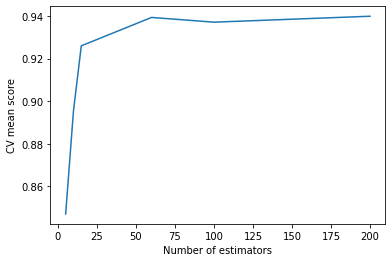

In [22]:
plt.plot(n_estimators, n_estimators_scores)
plt.xlabel("Number of estimators")
plt.ylabel("CV mean score")

#### Max features

In [23]:
n_features = np.array(np.arange(0, 64, 8))

n_features_scores = np.empty(shape=(n_features.shape[0],)) 

for i, n in enumerate(n_features):
    random_forest = RandomForestClassifier(max_features=n)
    cv_score = cross_val_score(random_forest, data, target, n_jobs=-1)
    n_features_scores[i] = cv_score.mean()

Text(0, 0.5, 'CV mean score')

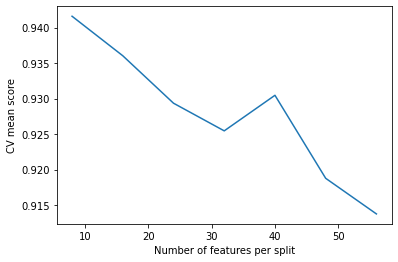

In [24]:
plt.plot(n_features, n_features_scores)
plt.xlabel("Number of features per split")
plt.ylabel("CV mean score")

#### Max depth

In [25]:
n_depth = np.array(np.arange(0, 100, 5))

n_depth_scores = np.empty(shape=(n_depth.shape[0],)) 

for i, n in enumerate(n_depth):
    random_forest = RandomForestClassifier(max_depth=n)
    cv_score = cross_val_score(random_forest, data, target, n_jobs=-1)
    n_depth_scores[i] = cv_score.mean()

Text(0, 0.5, 'CV mean score')

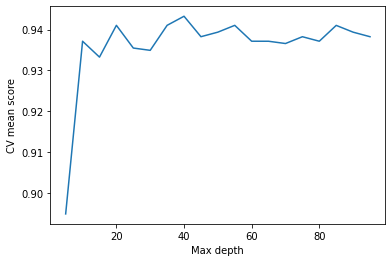

In [26]:
plt.plot(n_depth, n_depth_scores)
plt.xlabel("Max depth")
plt.ylabel("CV mean score")

In [27]:
answers5 = [2, 3, 4, 7]
answers5 = [str(value) for value in answers5]
with open("answer-5.txt", 'w') as file:
    file.write(" ".join(answers5))